## import useful packages

In [2]:
import janitor
import os
import glob
import mitosheet
import ipywidgets as widgets
%matplotlib inline
#%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

from sklearn.model_selection import cross_val_score


%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

In [3]:
# read exported data
index_col="date"
data=pd.read_csv('df_219.csv', sep=",", encoding = "ISO-8859-1", index_col=index_col)
data.shape



(11319, 93)

<AxesSubplot:>

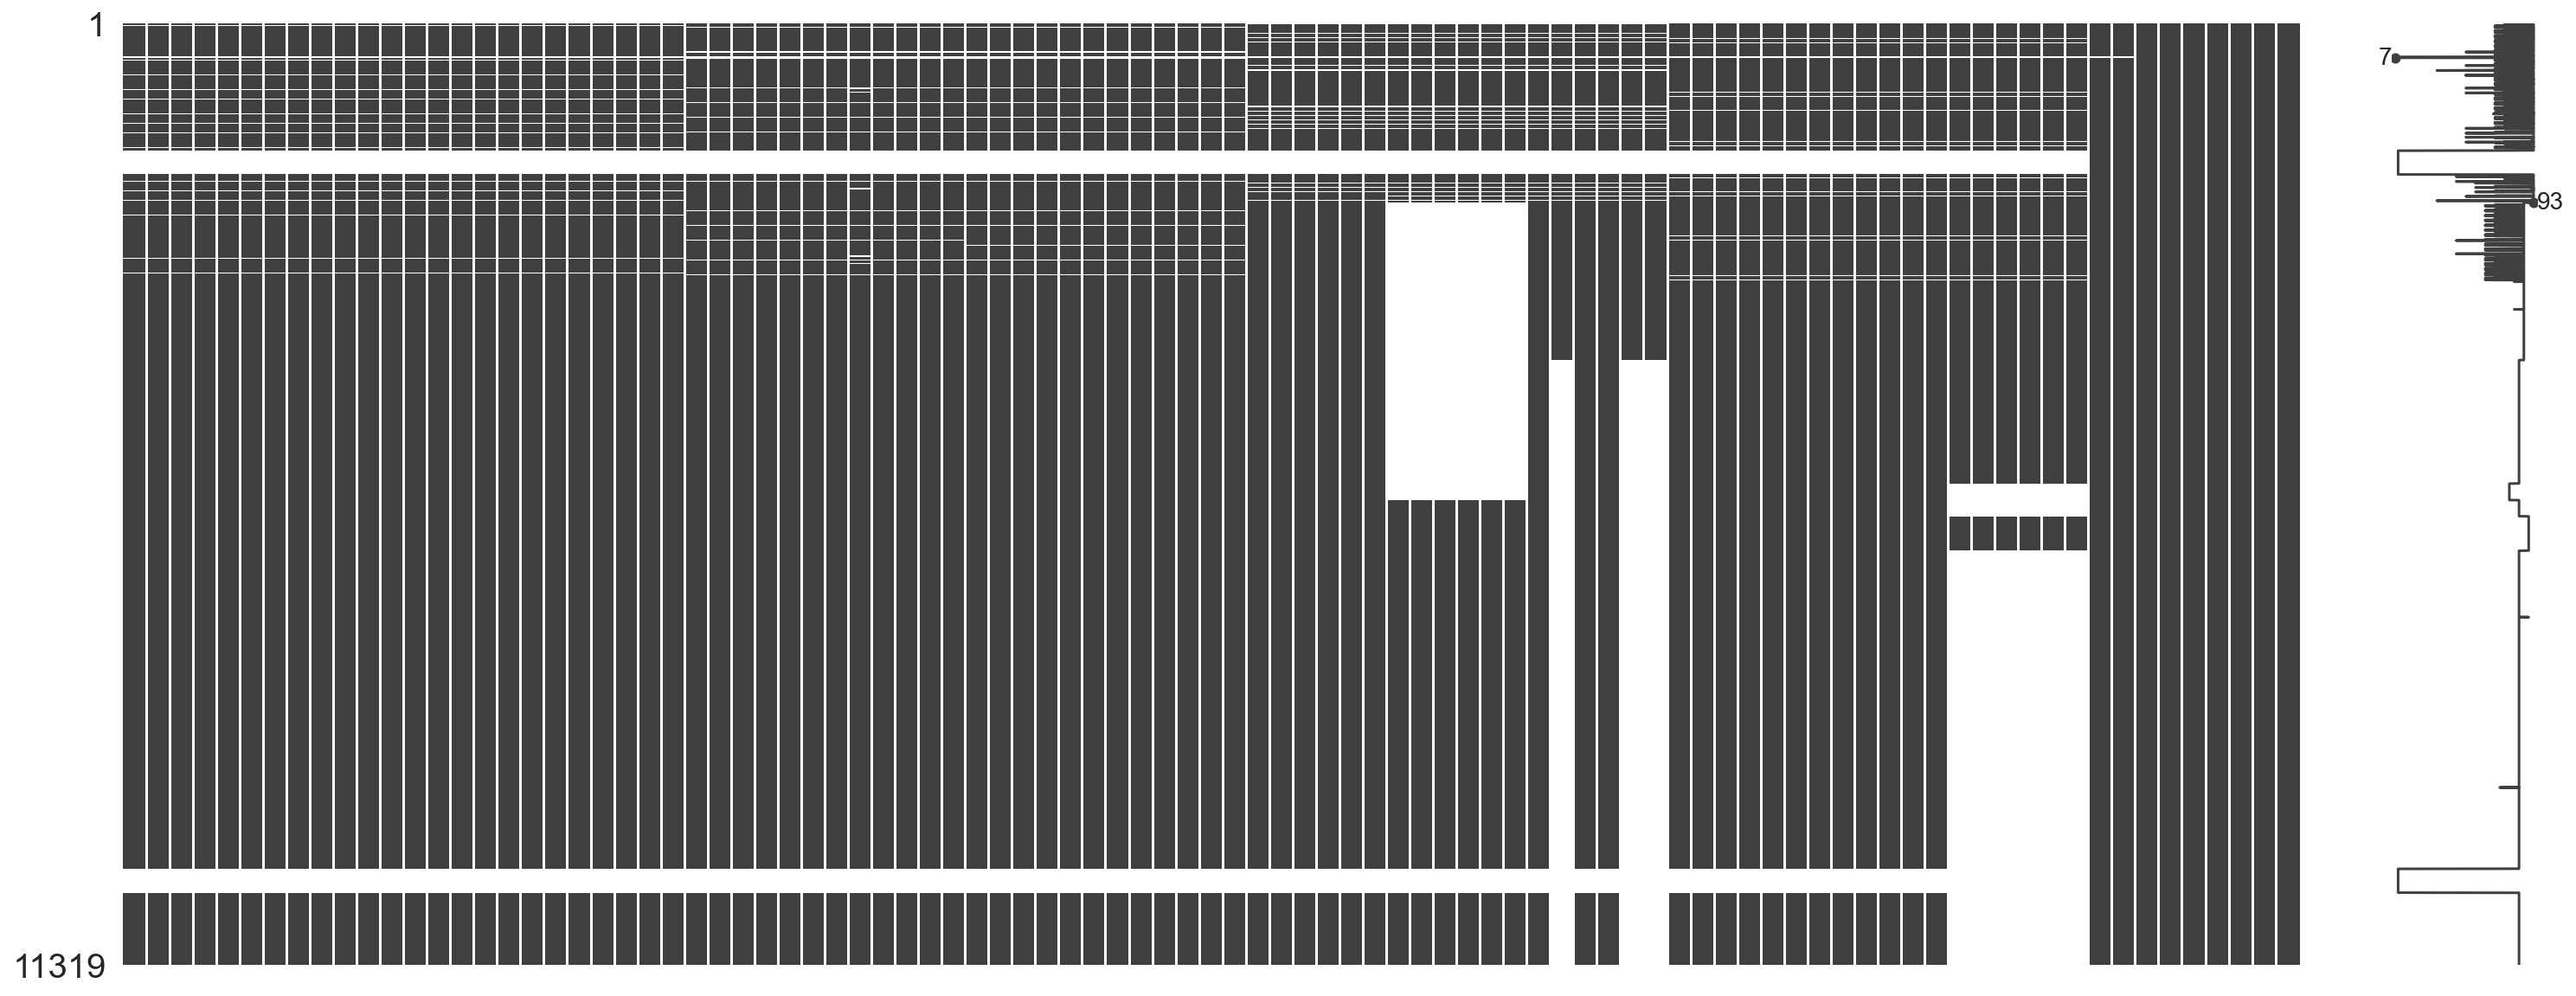

In [4]:
#!pip install missingno
import missingno as msno
msno.matrix(data)


In [5]:
# delet colones where more then 7% of missing data
df = data.copy()
perc = 7 # Like N %
min_count =  int(((100-perc)/100)*df.shape[0] + 1)

In [6]:
min_count

10527

In [7]:
df = df.dropna( axis=1, 
                thresh=min_count)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11319 entries, 2022-03-25 16:45:00 to 2022-05-03 23:55:00
Data columns (total 78 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   co2_100               10568 non-null  float64
 1   tvoc_100              10568 non-null  float64
 2   temperature_100       10568 non-null  float64
 3   humidity_100          10568 non-null  float64
 4   light_100             10568 non-null  float64
 5   sound_100             10568 non-null  float64
 6   co2_101               10569 non-null  float64
 7   tvoc_101              10569 non-null  float64
 8   temperature_101       10569 non-null  float64
 9   humidity_101          10569 non-null  float64
 10  light_101             10569 non-null  float64
 11  sound_101             10569 non-null  float64
 12  co2_102               10565 non-null  float64
 13  tvoc_102              10565 non-null  float64
 14  temperature_102       10565 non-null  float

<AxesSubplot:>

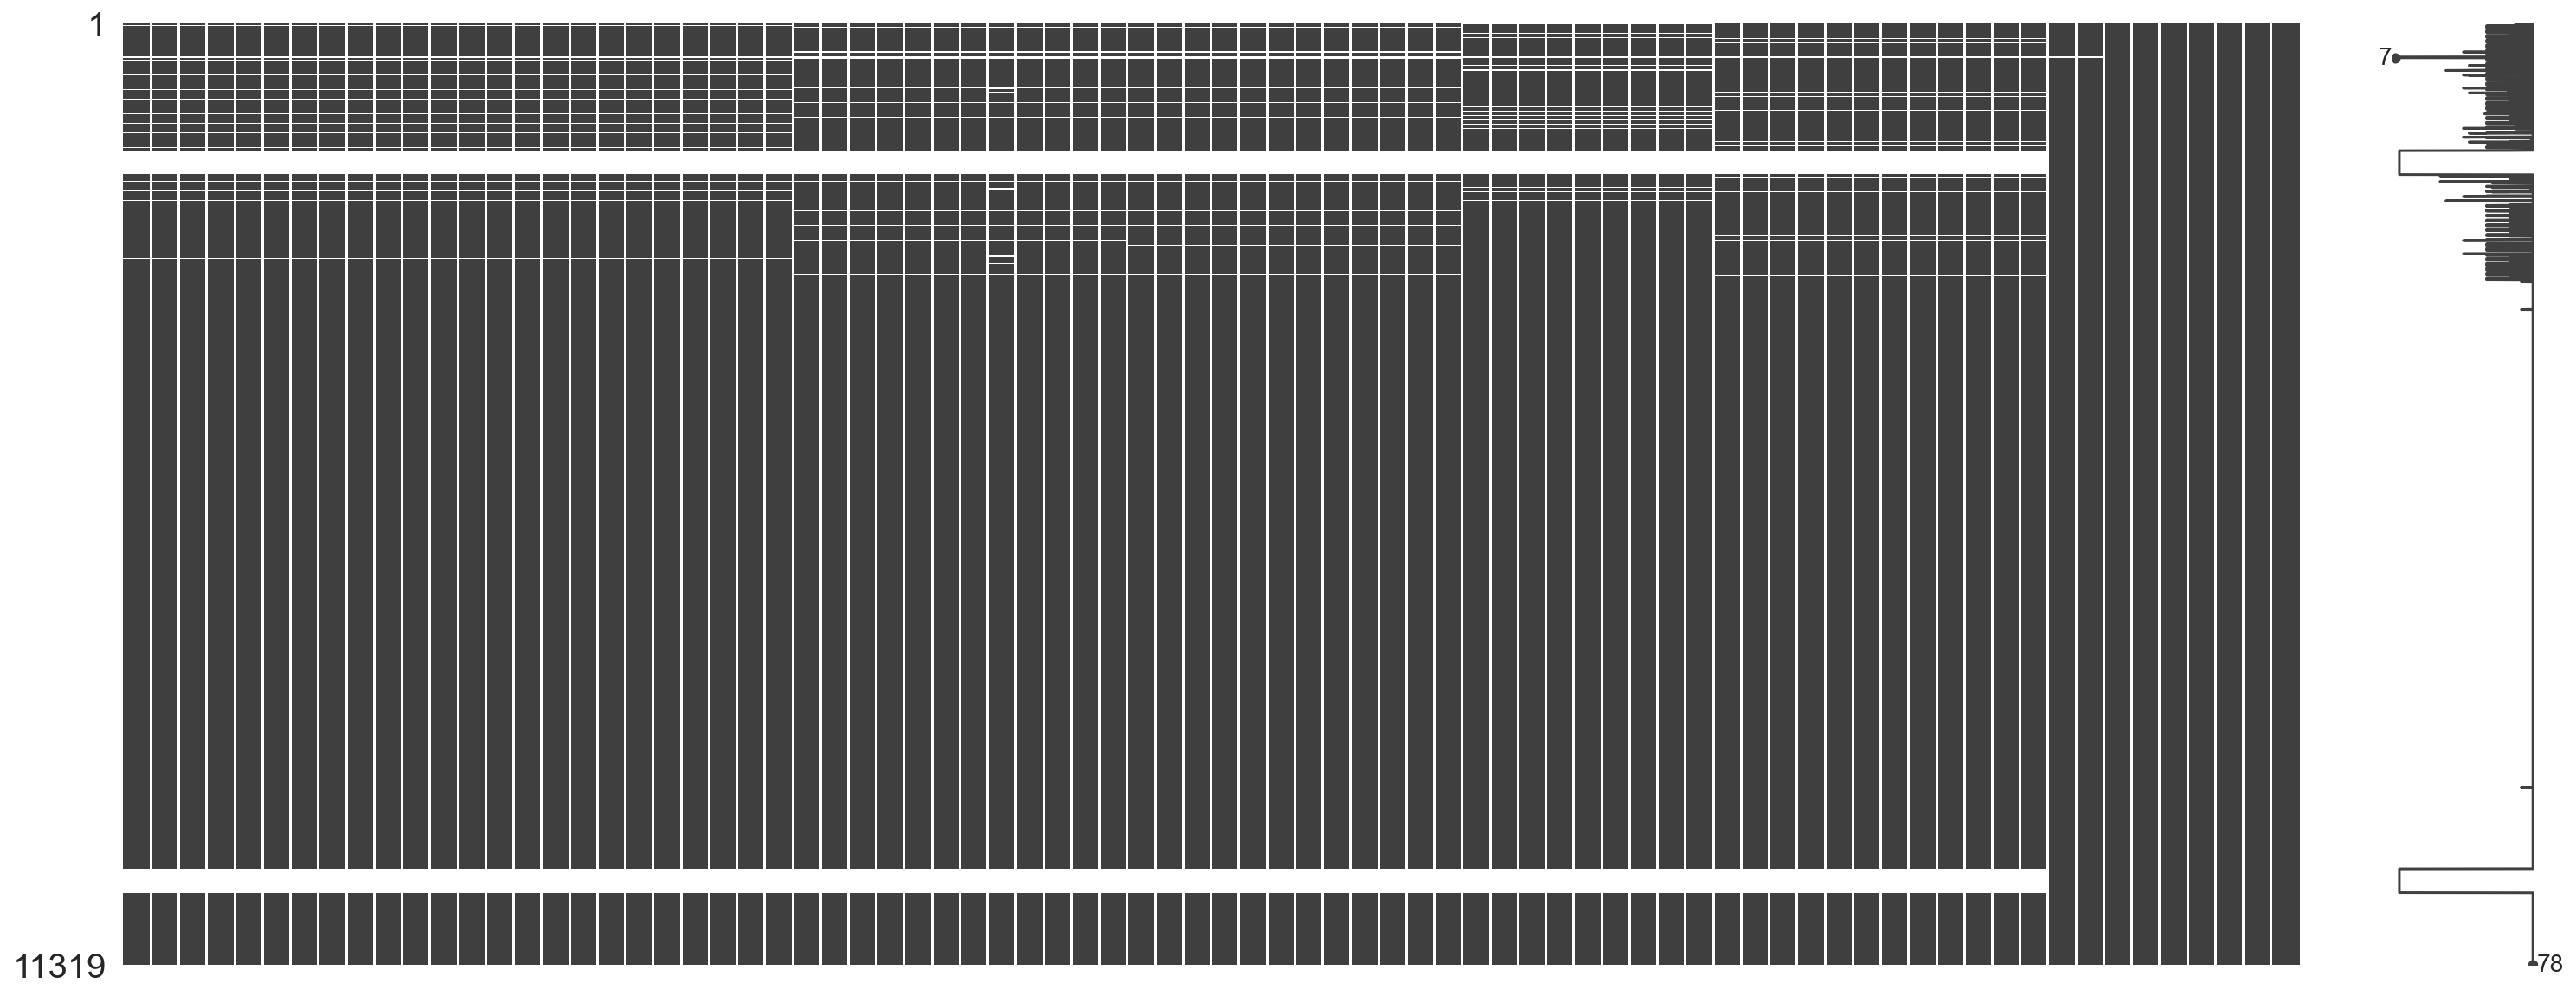

In [11]:
msno.matrix(df)

In [9]:
df.interpolate(method='linear', inplace=True)
df.fillna(method='ffill',inplace=True)
df.fillna(method='bfill',inplace=True)

In [13]:
dfna =df.dropna().copy()

In [35]:
#dfna.co2_100.plot()
df.index = pd.to_datetime(df.index)

In [40]:
df1=df.resample("30T").mean()

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1887 entries, 2022-03-25 16:30:00 to 2022-05-03 23:30:00
Freq: 30T
Data columns (total 75 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   co2_100               1789 non-null   float64
 1   tvoc_100              1789 non-null   float64
 2   temperature_100       1789 non-null   float64
 3   humidity_100          1789 non-null   float64
 4   light_100             1789 non-null   float64
 5   sound_100             1789 non-null   float64
 6   co2_101               1789 non-null   float64
 7   tvoc_101              1789 non-null   float64
 8   temperature_101       1789 non-null   float64
 9   humidity_101          1789 non-null   float64
 10  light_101             1789 non-null   float64
 11  sound_101             1789 non-null   float64
 12  co2_102               1789 non-null   float64
 13  tvoc_102              1789 non-null   float64
 14  temperature_102       1789

In [36]:
a=df.index.to_series().diff()


In [37]:
for i in a:
    if  i != a.iloc[2]:
        print(i)

NaT


In [11]:
x = {"close": 0, "open" : 1}
df = df.replace(x)
df

,co2_100,tvoc_100,temperature_100,humidity_100,light_100,sound_100,co2_101,tvoc_101,temperature_101,humidity_101,...,sound_112,elec_general_219_w,elec_eclairage_219_w,weather_out,weather_hum,weather_bar_,weather_rad_,state_AA7BF5,state_AA4706,state_AA9130
date,,,,,,,,,,,,,,,,,,,,,
2022-03-25 16:45:00,431.000000,101.750000,24.277500,18.717500,1023.000000,509.500000,307.000000,51.750000,21.862500,20.172500,...,511.000000,767.510,308.070,21.200000,22.500000,1023.900000,344.500000,1,1,1
2022-03-25 16:50:00,479.000000,119.333333,24.486667,18.933333,1022.000000,510.000000,308.000000,65.000000,22.256667,19.870000,...,511.666667,710.274,308.070,21.166667,22.666667,1023.900000,333.000000,0,0,0
2022-03-25 16:55:00,401.666667,88.000000,23.396667,19.770000,1023.000000,509.666667,355.666667,102.333333,23.266667,19.556667,...,510.500000,620.808,212.622,21.133333,22.833333,1023.900000,321.500000,0,0,0
2022-03-25 17:00:00,435.500000,183.000000,25.515000,17.945000,1022.750000,509.500000,338.750000,197.250000,25.135000,18.025000,...,511.000000,452.432,0.000,21.100000,23.000000,1023.900000,310.000000,0,0,0
2022-03-25 17:05:00,431.333333,230.666667,26.533333,17.183333,1022.666667,509.000000,337.333333,234.333333,26.130000,17.266667,...,512.250000,445.334,0.000,21.033333,23.666667,1023.916667,297.166667,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-03 23:35:00,412.600000,1079.800000,24.780000,30.770000,316.600000,509.600000,411.200000,1004.800000,24.684000,30.682000,...,511.000000,301.452,0.000,14.100000,66.000000,1020.100000,0.000000,0,0,0
2022-05-03 23:40:00,410.250000,1072.000000,24.770000,30.780000,340.500000,509.250000,410.750000,1002.250000,24.697500,30.697500,...,511.000000,301.452,0.000,14.100000,66.000000,1020.100000,0.000000,0,0,0
2022-05-03 23:45:00,413.750000,1061.000000,24.782500,30.762500,324.750000,509.500000,411.250000,989.250000,24.665000,30.722500,...,511.200000,302.046,0.000,14.000000,66.000000,1020.100000,0.000000,0,0,0


In [12]:
df["windows"] = df["state_AA7BF5"] +  df["state_AA4706"] + df["state_AA9130"] #+  df["state_483FDA81E0F4"] 
df

,co2_100,tvoc_100,temperature_100,humidity_100,light_100,sound_100,co2_101,tvoc_101,temperature_101,humidity_101,...,elec_general_219_w,elec_eclairage_219_w,weather_out,weather_hum,weather_bar_,weather_rad_,state_AA7BF5,state_AA4706,state_AA9130,windows
date,,,,,,,,,,,,,,,,,,,,,
2022-03-25 16:45:00,431.000000,101.750000,24.277500,18.717500,1023.000000,509.500000,307.000000,51.750000,21.862500,20.172500,...,767.510,308.070,21.200000,22.500000,1023.900000,344.500000,1,1,1,3
2022-03-25 16:50:00,479.000000,119.333333,24.486667,18.933333,1022.000000,510.000000,308.000000,65.000000,22.256667,19.870000,...,710.274,308.070,21.166667,22.666667,1023.900000,333.000000,0,0,0,0
2022-03-25 16:55:00,401.666667,88.000000,23.396667,19.770000,1023.000000,509.666667,355.666667,102.333333,23.266667,19.556667,...,620.808,212.622,21.133333,22.833333,1023.900000,321.500000,0,0,0,0
2022-03-25 17:00:00,435.500000,183.000000,25.515000,17.945000,1022.750000,509.500000,338.750000,197.250000,25.135000,18.025000,...,452.432,0.000,21.100000,23.000000,1023.900000,310.000000,0,0,0,0
2022-03-25 17:05:00,431.333333,230.666667,26.533333,17.183333,1022.666667,509.000000,337.333333,234.333333,26.130000,17.266667,...,445.334,0.000,21.033333,23.666667,1023.916667,297.166667,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-03 23:35:00,412.600000,1079.800000,24.780000,30.770000,316.600000,509.600000,411.200000,1004.800000,24.684000,30.682000,...,301.452,0.000,14.100000,66.000000,1020.100000,0.000000,0,0,0,0
2022-05-03 23:40:00,410.250000,1072.000000,24.770000,30.780000,340.500000,509.250000,410.750000,1002.250000,24.697500,30.697500,...,301.452,0.000,14.100000,66.000000,1020.100000,0.000000,0,0,0,0
2022-05-03 23:45:00,413.750000,1061.000000,24.782500,30.762500,324.750000,509.500000,411.250000,989.250000,24.665000,30.722500,...,302.046,0.000,14.000000,66.000000,1020.100000,0.000000,0,0,0,0


In [13]:
# df1 = df.iloc[:,30:].copy()
# df1=df1.drop(columns=["state_AA7BF5","state_AA4706","state_AA9130","state_483FDA81E0F4","elec_eclairage_219_w"])
# sns.pairplot(df1,  hue='windows')
# plt.show

In [14]:
df.windows.max()

3

In [15]:
# df.to_csv("../HandlingMissingData/df_219complet.csv")

In [16]:
corr = df.corr()
corr.tail(40)

,co2_100,tvoc_100,temperature_100,humidity_100,light_100,sound_100,co2_101,tvoc_101,temperature_101,humidity_101,...,elec_general_219_w,elec_eclairage_219_w,weather_out,weather_hum,weather_bar_,weather_rad_,state_AA7BF5,state_AA4706,state_AA9130,windows
humidity_106,0.301712,0.276009,0.214332,0.983445,0.015146,-0.048453,0.372666,0.326502,0.208571,0.969613,...,0.185706,0.186876,0.287915,0.456459,-0.410810,0.009176,-0.042957,0.345813,0.058748,0.301584
light_106,0.517151,0.247199,0.424506,0.072127,0.759690,0.206367,0.517985,0.266379,0.316927,0.102128,...,0.509474,0.461186,0.313643,-0.316946,0.009256,0.717073,0.239619,0.022937,0.210774,0.148341
sound_106,-0.057595,-0.016332,-0.040534,-0.008629,-0.078443,-0.036750,-0.055446,-0.039701,-0.028936,-0.012522,...,-0.074139,-0.073554,-0.020816,0.028429,0.005919,-0.075822,-0.084165,0.002754,-0.009106,-0.023774
co2_107,0.989748,0.693419,0.672268,0.283939,0.320670,0.061991,0.980993,0.726304,0.635934,0.273016,...,0.712686,0.560715,0.098969,0.042371,-0.080108,0.232447,0.184236,-0.030684,0.124554,0.061639
tvoc_107,0.741390,0.936595,0.629172,0.257839,0.144659,0.027367,0.695280,0.936277,0.598751,0.246762,...,0.568024,0.471130,-0.047992,0.225912,-0.167269,-0.003309,0.096541,-0.186317,0.139418,-0.091789
temperature_107,0.628611,0.557799,0.878175,0.163899,0.268273,0.050305,0.618627,0.568835,0.812275,0.150645,...,0.605716,0.450876,0.402923,-0.211803,0.044751,0.241309,0.338471,-0.118674,0.227452,0.059455
humidity_107,0.312990,0.282020,0.220397,0.982672,0.018303,-0.047503,0.382770,0.334170,0.215613,0.968093,...,0.202250,0.201786,0.285233,0.457895,-0.421447,0.008006,-0.046286,0.350695,0.052927,0.303130
light_107,0.452702,0.184066,0.382021,0.050688,0.796762,0.223752,0.459511,0.200024,0.272136,0.082127,...,0.416547,0.349787,0.352349,-0.369108,0.037911,0.768571,0.232134,0.052645,0.195553,0.167239
sound_107,0.022285,-0.016803,0.011843,0.017809,0.017115,-0.020139,0.029642,-0.009804,0.001513,0.022320,...,-0.000967,-0.016368,0.044660,-0.037367,0.023083,0.043945,0.061617,0.022364,0.005930,0.038078
co2_108,0.985230,0.727099,0.683063,0.228278,0.335972,0.074680,0.955326,0.759644,0.641344,0.220596,...,0.727662,0.584104,0.042374,0.058942,-0.098804,0.206565,0.186733,-0.072761,0.125037,0.026424


In [17]:
s=corr["elec_eclairage_219_w"]
s.sort_values(ascending=False)
var = ["co2_104","co2_107","temperature_106","windows"]
var = ["co2_107","temperature_106"]

In [18]:
# col = []
# j=0
# for i in s:
#     if i>0.65:
#         col.append(j)
#     j=j+1    
# col        

In [19]:
var = df.columns

In [20]:
var = var.drop([ 'state_AA7BF5', 'state_AA4706', 'state_AA9130',
        'elec_general_219_w',
       'elec_eclairage_219_w'])

In [21]:
X=df[var]

In [22]:
df["elecWithoutEclairage"]= df[ 'elec_general_219_w'] - df['elec_eclairage_219_w']

In [23]:
y=df["elecWithoutEclairage"]

<AxesSubplot:xlabel='date'>

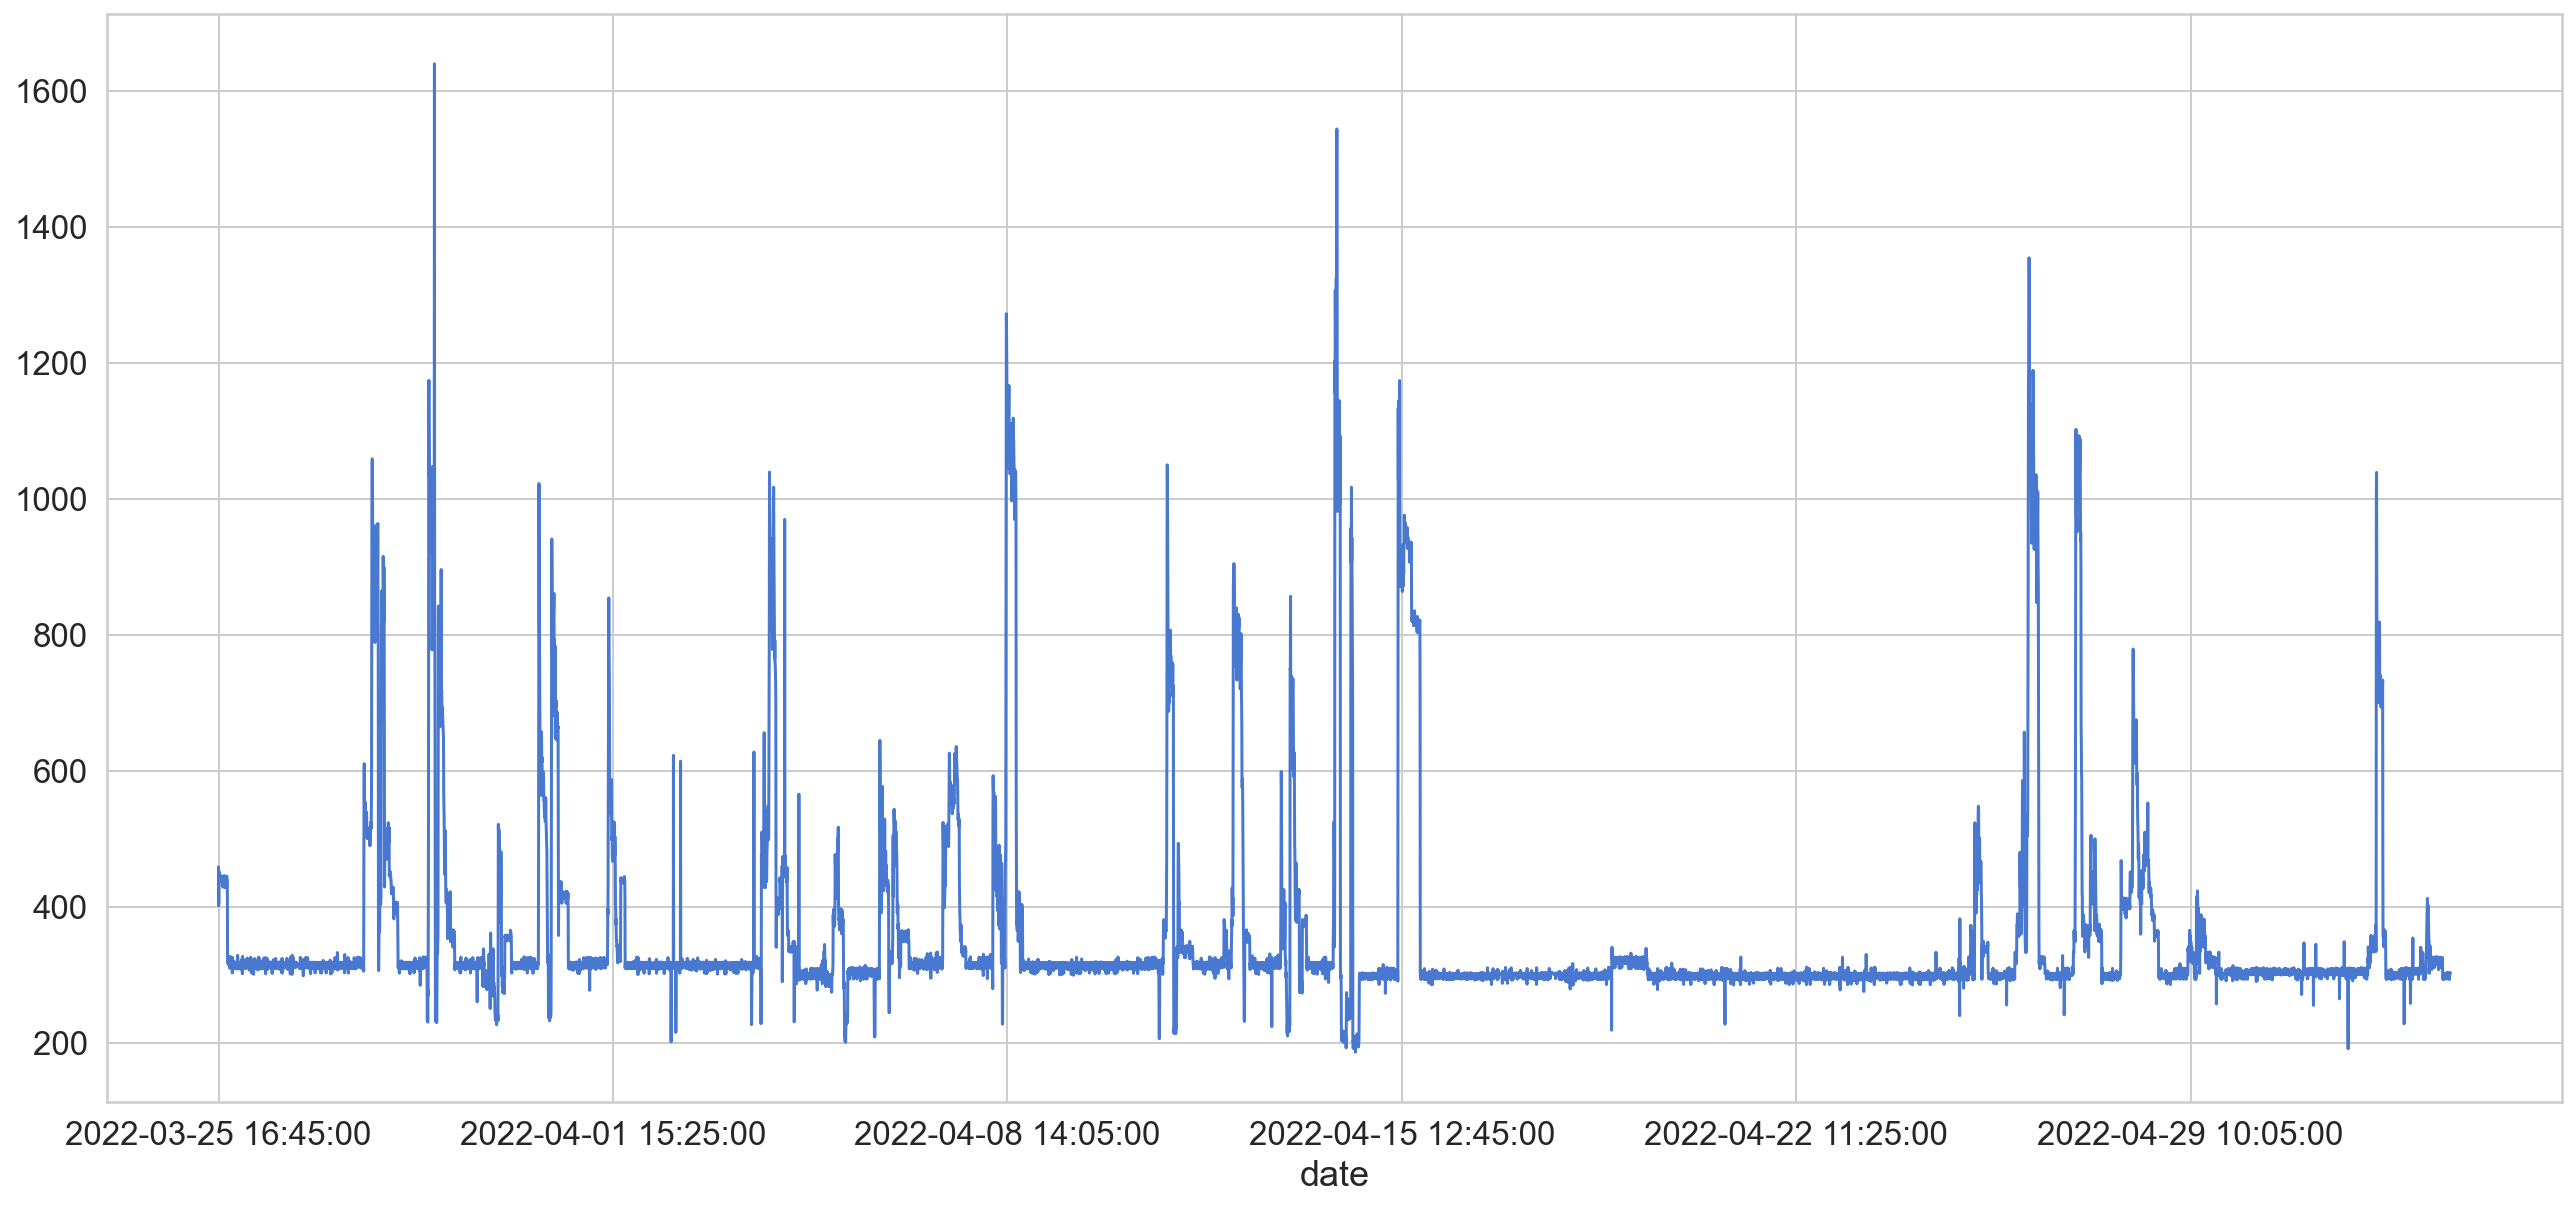

In [24]:
df["elecWithoutEclairage"].plot()

In [25]:
y.to_csv("../HandlingMissingData/y_219.csv")

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_
selector.ranking_

In [20]:
import pandas as pd
p=0.01
y=pd.read_csv("y.csv", parse_dates=["date"], index_col="date")
X=pd.read_csv("X.csv", parse_dates=["date"], index_col="date")
y = y.values.ravel()
X_train = X[:int(X.shape[0]*p)]
X_test = X[int(X.shape[0]*p):]
y_train = y[:int(X.shape[0]*p)]
y_test = y[int(X.shape[0]*p):]

In [2]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=2)
selector = selector.fit(X_train, y_train)
selector.support_

selector.ranking_

array([ 9, 24, 19, 43, 55, 23, 14,  8, 51, 12, 47, 62, 20, 67, 18, 48, 42,
       30, 52, 35,  1, 13,  5,  2, 64, 10,  4, 16,  1, 45, 61, 53, 57, 41,
        1, 58, 22, 34, 50, 54,  1, 36, 32, 65,  1, 56,  1, 27, 38,  6, 40,
       15, 25,  1, 44,  1, 28,  7, 37, 11, 63, 39, 60, 49, 66,  3, 29, 59,
       33, 26, 21, 17, 46, 31])

In [3]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
# X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False])

In [8]:
X_train.iloc[:,selector.ranking_]

,tvoc_101,light_103,sound_102,sound_106,sound_108,humidity_103,co2_102,co2_101,tvoc_108,light_101,...,tvoc_112,tvoc_100,humidity_104,co2_111,tvoc_105,co2_104,tvoc_103,humidity_102,temperature_107,sound_104
date,,,,,,,,,,,,,,,,,,,,,
2022-03-25 16:45:00,51.750000,632.333333,509.750000,507.000000,11.00,19.616667,421.500000,307.000000,141.000000,571.750000,...,125.500000,101.750000,18.223333,433.500000,44.500000,391.333333,27.666667,19.227500,26.412500,512.00
2022-03-25 16:50:00,65.000000,630.250000,510.000000,506.666667,11.00,19.540000,366.000000,308.000000,160.461538,568.666667,...,127.333333,119.333333,18.220000,438.000000,93.000000,388.000000,50.500000,19.790000,26.893333,512.00
2022-03-25 16:55:00,102.333333,614.333333,510.000000,506.333333,11.00,19.110000,415.333333,355.666667,179.923077,522.666667,...,127.000000,88.000000,17.650000,440.250000,138.666667,414.000000,123.666667,19.076667,27.160000,512.25
2022-03-25 17:00:00,197.250000,601.000000,510.750000,507.500000,11.00,18.173333,413.250000,338.750000,199.384615,447.750000,...,154.000000,183.000000,17.160000,431.250000,172.000000,411.666667,171.666667,17.837500,27.587500,512.00
2022-03-25 17:05:00,234.333333,598.750000,510.333333,508.000000,11.00,17.727500,411.666667,337.333333,218.846154,442.000000,...,201.500000,230.666667,17.033333,443.750000,271.666667,411.333333,201.250000,17.383333,27.820000,512.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-26 00:00:00,752.750000,0.000000,510.250000,507.666667,6.00,22.876667,394.000000,326.500000,781.666667,0.000000,...,597.250000,784.250000,22.236667,419.750000,2368.666667,391.000000,567.666667,22.562500,25.636667,512.00
2022-03-26 00:05:00,736.000000,0.000000,510.000000,507.000000,6.50,22.912500,397.666667,331.000000,791.500000,0.000000,...,596.000000,796.666667,22.287500,419.000000,2392.000000,391.250000,577.000000,22.590000,25.636667,512.00
2022-03-26 00:10:00,740.333333,0.000000,510.000000,508.000000,6.50,22.916667,399.666667,330.666667,777.500000,0.000000,...,598.333333,798.333333,22.290000,421.333333,2335.333333,390.333333,563.666667,22.596667,25.622500,512.00


In [26]:
colonesSelected = []
for i,j in enumerate(selector.ranking_):
    if j<3:
        colonesSelected.append(i)

In [28]:
var=X.columns[colonesSelected]

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [25]:
var

Index(['temperature_103', 'light_103', 'sound_103', 'temperature_104',
       'light_104', 'light_105', 'light_106', 'temperature_107', 'light_107',
       'tvoc_108', 'sound_108', 'temperature_110', 'temperature_112'],
      dtype='object')

In [ ]:
var =Index(['temperature_103', 'light_103', 'sound_103', 'temperature_104',
       'light_104', 'light_105', 'light_106', 'temperature_107', 'light_107',
       'tvoc_108', 'sound_108', 'temperature_110', 'temperature_112'],
      dtype='object')

In [21]:
import pandas
from sklearn import linear_model

X = X[var].copy()
print(X.columns)
col = [0, 4, 5, 7, 8, 9, 13, 14, 15, 17, 18, 21, 25, 26, 29, 30, 32, 33, 34, 35, 36]
col = [0, 4, 5, 7,  9, 13, 15, 18, 21, 26,  30]
col2    =[0, 1, 2, 3, 4, 5,6,  8, 10, 11, 13, 14,15]
# X= X[col]
#X= X.iloc[:,col]
y = y
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train = X_train.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datascaler=scaler.fit(X_train)
X_train= datascaler.transform(X_train)
X_test= datascaler.transform(X_test)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)


print(regr.coef_) 

[-4.00663437e+01 -6.73688337e+01 -2.40580680e-01  6.03623965e+01
  1.27906984e+02 -8.19228488e+01  6.47796991e+02  1.06928038e+02
 -5.21727828e+02  4.09043853e+01 -6.39264767e+00  1.78364315e-01
 -5.67691217e+01]


/home/ahmed/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     2297.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        16:40:36   Log-Likelihood:                -45754.
No. Observations:                7392   AIC:                         9.154e+04
Df Residuals:                    7378   BIC:                         9.163e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        413.8061      1.374    301.197      0.0

In [23]:
lm = linear_model.LinearRegression()
X, y=X_train, y_train
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX.columns)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilities
0       413.8061            1.374   301.197          0.000
1       -40.0663            2.607   -15.369          0.000
2       -67.3688            7.020    -9.597          0.000
3        -0.2406            1.410    -0.171          0.865
4        60.3624            4.207    14.347          0.000
5       127.9070           16.917     7.561          0.000
6       -81.9228           25.722    -3.185          0.001
7       647.7970            9.608    67.424          0.000
8       106.9280            7.267    14.715          0.000
9      -521.7278           16.696   -31.248          0.000
10       40.9044            1.891    21.627          0.000
11       -6.3926            1.767    -3.618          0.000
12        0.1784            1.751     0.102          0.919
13      -56.7691            5.568   -10.195          0.000


In [ ]:
col= []
for i,pval in enumerate(myDF3["Probabilities"]):
    if pval<=0.00001:
        col.append(i-1)
col   = col[1:] 

In [ ]:
col

In [ ]:
X_train

In [ ]:
X

In [24]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print("r2 socre is ",score)
print("mean_sqrd_error is ",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is  0.7863691726246336
mean_sqrd_error is  16006.476687800314
root_mean_squared error of is  126.51670517287555


In [ ]:
d = {'y_pred': y_pred, 'y_test': y_test}
dfplot= pd.DataFrame(data=d)
dfplot.plot()


## Missing data generation

In [ ]:
#!pip install torch
#!pip install wget 
import wget
#wget.download('https://raw.githubusercontent.com/BorisMuzellec/MissingDataOT/master/utils.py')

import numpy as np
import pandas as pd
from utils import *
import torch
import seaborn as sns

In [ ]:
df1 = df.copy()



In [ ]:
df.plot()

In [ ]:
#!pip install category_encoders
import category_encoders as ce
# Get a new clean dataframe
obj_df = df1.select_dtypes(include=['object']).copy()

In [ ]:
df1 = obj_df.replace(x)

In [ ]:
df1.plot()

In [ ]:
# Fix the seed ------------------------------------------------------
np.random.seed(2)

In [ ]:
# Function produce_NA for generating missing values ------------------------------------------------------

def produce_NA(X, p_miss, mecha="MCAR", opt=None, p_obs=None, q=None):
    """
    Generate missing values for specifics missing-data mechanism and proportion of missing values. 
    
    Parameters
    ----------
    X : torch.DoubleTensor or np.ndarray, shape (n, d)
        Data for which missing values will be simulated.
        If a numpy array is provided, it will be converted to a pytorch tensor.
    p_miss : float
        Proportion of missing values to generate for variables which will have missing values.
    mecha : str, 
            Indicates the missing-data mechanism to be used. "MCAR" by default, "MAR", "MNAR" or "MNARsmask"
    opt: str, 
         For mecha = "MNAR", it indicates how the missing-data mechanism is generated: using a logistic regression ("logistic"), quantile censorship ("quantile") or logistic regression for generating a self-masked MNAR mechanism ("selfmasked").
    p_obs : float
            If mecha = "MAR", or mecha = "MNAR" with opt = "logistic" or "quanti", proportion of variables with *no* missing values that will be used for the logistic masking model.
    q : float
        If mecha = "MNAR" and opt = "quanti", quantile level at which the cuts should occur.
    
    Returns
    ----------
    A dictionnary containing:
    'X_init': the initial data matrix.
    'X_incomp': the data with the generated missing values.
    'mask': a matrix indexing the generated missing values.s
    """
    
    to_torch = torch.is_tensor(X) ## output a pytorch tensor, or a numpy array
    if not to_torch:
        X = X.astype(np.float32)
        X = torch.from_numpy(X)
    
    if mecha == "MAR":
        mask = MAR_mask(X, p_miss, p_obs).double()
    elif mecha == "MNAR" and opt == "logistic":
        mask = MNAR_mask_logistic(X, p_miss, p_obs).double()
    elif mecha == "MNAR" and opt == "quantile":
        mask = MNAR_mask_quantiles(X, p_miss, q, 1-p_obs).double()
    elif mecha == "MNAR" and opt == "selfmasked":
        mask = MNAR_self_mask_logistic(X, p_miss).double()
    else:
        mask = (torch.rand(X.shape) < p_miss).double()
    
    X_nas = X.clone()
    X_nas[mask.bool()] = np.nan
    
    return {'X_init': X.double(), 'X_incomp': X_nas.double(), 'mask': mask}

In [ ]:
X = df.copy()
shelly_219 =  ['state_AA7BF5','state_AA4706', 'state_AA9130', 'state_483FDA81E0F4']
for shelly in shelly_219:
    X = X.drop([shelly ], axis=1)

In [ ]:
X.columns

In [ ]:
X = X.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datascaler=scaler.fit(X)
X= datascaler.transform(X)

In [ ]:
import pandas as pd
df= pd.DataFrame(X)
df.index=data.index

In [ ]:
df.head()

In [ ]:
#df.to_csv('dataComplet_219.csv')

## MCAR Generation

In [ ]:
# Minimal example for generating missing data ------------------------
p='5.csv'
X_miss_mcar = produce_NA(X, p_miss=0.05, mecha="MCAR")
X_mcar = X_miss_mcar['X_incomp']
R_mcar = X_miss_mcar['mask']

print("Percentage of newly generated missing values: ", (R_mcar.sum()).numpy()/np.prod(R_mcar.size())*100, " %")

df = X_mcar
df = df.numpy()
mask=R_mcar
mask = mask.numpy()

df = pd.DataFrame(data=df, columns=['Temperature', 'Humidity', 'CO2', 'Noise','Pressure'])
mask = pd.DataFrame(data=mask, columns=['Temperature', 'Humidity', 'CO2', 'Noise','Pressure'])

df['time']= data.index
df.set_index('time',inplace = True)
mask['time']= data.index
mask.set_index('time',inplace = True)
df.to_csv('MCAR'+p)
mask.to_csv('mask'+p)

In [ ]:
#df.to_csv('MCAR25.csv')
# supprimer d'abord les deux lignes dans le fichier d'export Neatatmo
index_col="time"
df=pd.read_csv('MCAR40.csv', sep=",", encoding = "ISO-8859-1", index_col=index_col)
mask=pd.read_csv('mask40.csv', sep=",", encoding = "ISO-8859-1", index_col=index_col)
mask=mask.values


In [ ]:
# Sample mar data -----------------------------------------
X_miss_mar = produce_NA(X, p_miss=0.4, mecha="MAR", p_obs=0.4)

X_mar = X_miss_mar['X_incomp']
R_mar = X_miss_mar['mask']

print("Percentage of generated missing values: ", (R_mar.sum()).numpy()/np.prod(R_mar.size())*100, " %")

ax = sns.heatmap(X_mar, mask=R_mar.numpy()==1, linewidths=0.02, linecolor='black')

df = X_mar
df = df.numpy()
mask_mar = R_mar
mask_mar = mask_mar.numpy()

df = pd.DataFrame(data=df, columns=['Temperature', 'Humidity', 'CO2', 'Noise','Pressure'])
mask_mar = pd.DataFrame(data=mask_mar, columns=['Temperature', 'Humidity', 'CO2', 'Noise','Pressure'])



In [ ]:
# df['time']= data.index
# df.set_index('time',inplace = True)
# mask_mar['time'] = data.index
# mask_mar.set_index('time',inplace = True)
# df.to_csv('MAR'+p)
# mask_mar.to_csv('mask_mar'+p)

In [ ]:
# Minimal example for generating missing data ------------------------
p='5.csv'

In [ ]:
pourcentage=5
p=